## Audio analysis

In [33]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
filename = r'data\bengali\bengali1.mp3'
y, sr = librosa.load(filename)

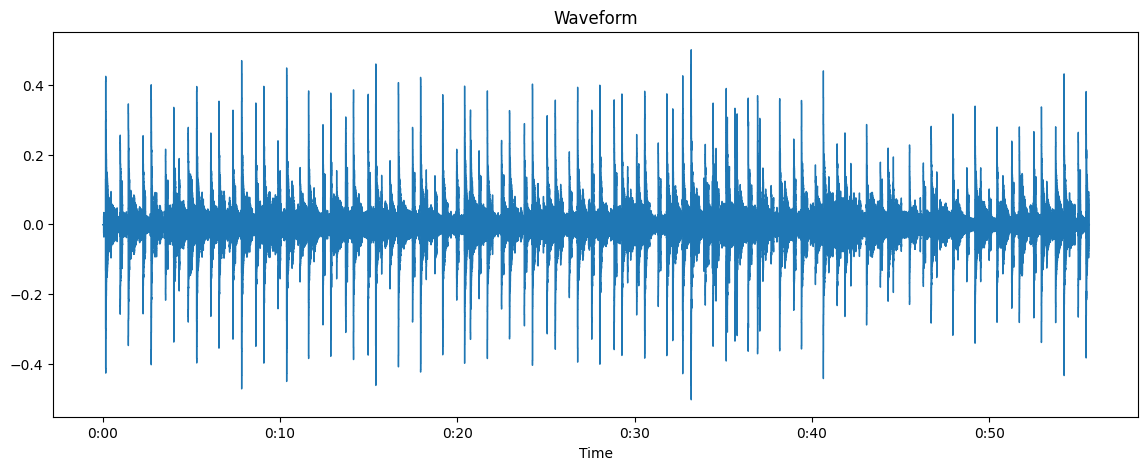

In [35]:
# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.show()

In [36]:
# Tempo
# Estimate the tempo and beat frames
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
#print(beat_frames)
print(tempo)

[129.19921875]


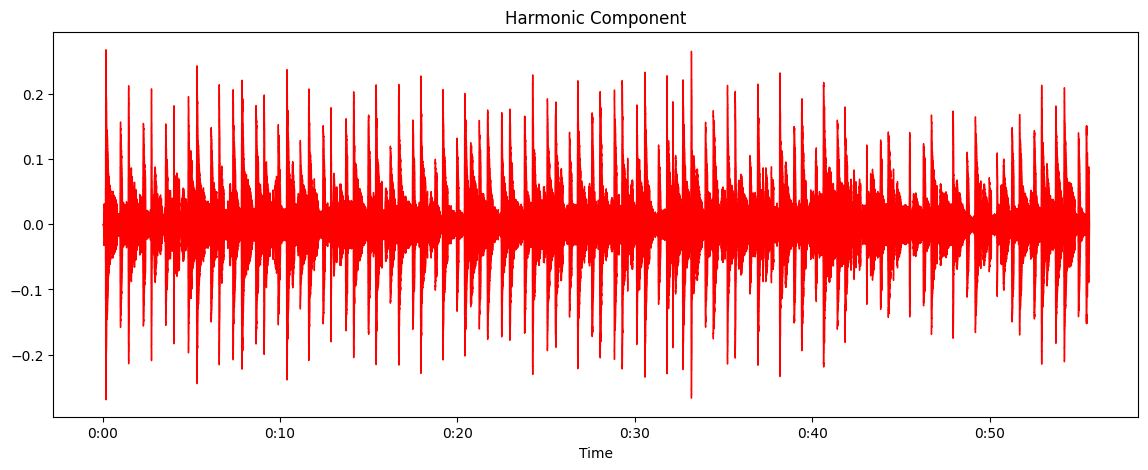

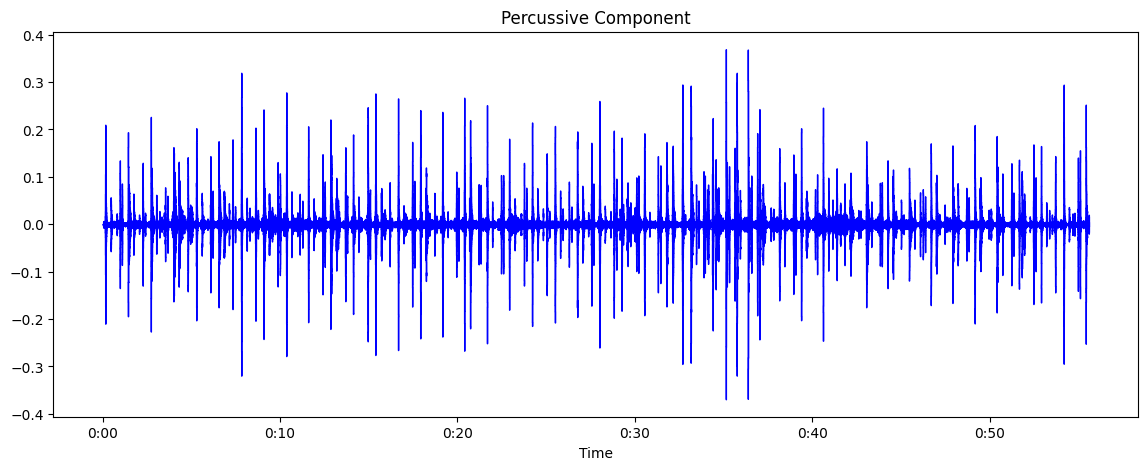

In [37]:
# Separate harmonic and percussive components
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Plot the harmonic component
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_harmonic, sr=sr, color='r')
plt.title("Harmonic Component")
plt.show()

# Plot the percussive component
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_percussive, sr=sr, color='b')
plt.title("Percussive Component")
plt.show()

In [38]:
# Mathematical features
cstft=librosa.feature.chroma_stft(y=y,sr=sr)
srms=librosa.feature.rms(y=y)
specband=librosa.feature.spectral_bandwidth(y=y,sr=sr)
speccent=librosa.feature.spectral_centroid(y=y,sr=sr)
mfcc = librosa.feature.mfcc(y=y, sr=sr)

In [39]:
print(f"cstft data: min:{cstft.min()} max:{cstft.max()} mean:{cstft.mean()}")
print(f"srms data: min:{srms.min()} max:{srms.max()} mean:{srms.mean()}")
print(f"specband data: min:{specband.min()} max:{specband.max()} mean:{specband.mean()}")
print(f"speccent data: min:{speccent.min()} max:{speccent.max()} mean:{speccent.mean()}")
print(f"mfcc data: min:{mfcc.min()} max:{mfcc.max()} mean:{mfcc.mean()}")

cstft data: min:0.0001557156938361004 max:1.0 mean:0.19982732832431793
srms data: min:0.00550650991499424 max:0.16529467701911926 mean:0.04121606796979904
specband data: min:1074.9101146229768 max:3035.9859451782486 mean:1766.5279758369988
speccent data: min:670.8087563715765 max:3517.3524022904035 mean:1262.9817029574688
mfcc data: min:-527.3231201171875 max:181.1389923095703 mean:-9.034904479980469


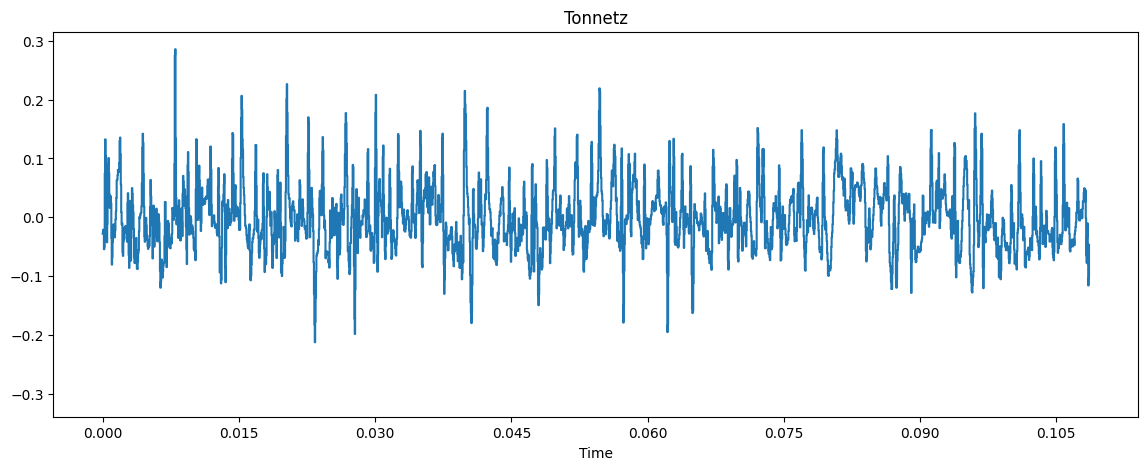

In [40]:
tonnetz = librosa.feature.tonnetz(y=y_harmonic, sr=sr)

# Plot 
plt.figure(figsize=(14, 5))
librosa.display.waveshow(tonnetz, sr=sr)
plt.title("Tonnetz")
plt.show()

In [47]:
class GenreClassfier:
    def __init__(self, filename, genre):
        self.genre = genre
        self.y, self.sr = librosa.load(filename)
        self.feature_extract()

    def feature_extract(self):
        # Tempo information
        self.tempo = librosa.feature.tempo(y=self.y, sr=self.sr).round()

        # Separate harmonic and percussive components, Tonnetz
        self.y_harmonic, self.y_percussive = librosa.effects.hpss(y)
        self.tonnetz = librosa.feature.tonnetz(y=y_harmonic, sr=sr)

        # Mathematical features
        features_list = {}

        cstft=librosa.feature.chroma_stft(y=y,sr=sr)
        features_list['cstft'] = [cstft.min(), cstft.mean(), cstft.max(), cstft.var()]

        srms=librosa.feature.rms(y=y)
        features_list['srms'] = [srms.min(), srms.mean(), srms.max(), srms.var()]

        specband=librosa.feature.spectral_bandwidth(y=y,sr=sr)
        features_list['specband'] = [specband.min(), specband.mean(), specband.max(), specband.var()]

        speccent=librosa.feature.spectral_centroid(y=y,sr=sr)
        features_list['speccent'] = [speccent.min(), speccent.mean(), speccent.max(), speccent.var()]

        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        features_list['mfcc'] = [mfcc.min(), mfcc.mean(), mfcc.max(), mfcc.var()]

        self.features_df = pd.DataFrame(features_list).transpose()
        self.features_df.columns = ['min', 'mean', 'max', 'var']

    def print_features(self):
        print(f"Genre: {self.genre}")
        print(f"Tempo: {self.tempo}")

        print(self.features_df)

    def plot_waveform(self):
        plt.figure(figsize=(14, 5))
        librosa.display.waveshow(self.y, sr=self.sr)
        plt.title("Waveform")
        plt.show()

    def plot_Harmonic_Percussion(self):
        # Plot
        fig = plt.figure(figsize=(14, 5))
        ax1 = fig.subplots() #Creates the Axis
        ax2 = ax1.twinx() #Creates twin axis

        librosa.display.waveshow(self.y_harmonic, sr=self.sr, color='r', ax= ax1)
        librosa.display.waveshow(self.y_percussive, sr=self.sr, color='b', ax = ax2)
        plt.title("Harmonic and Percussive Component")
        plt.show()

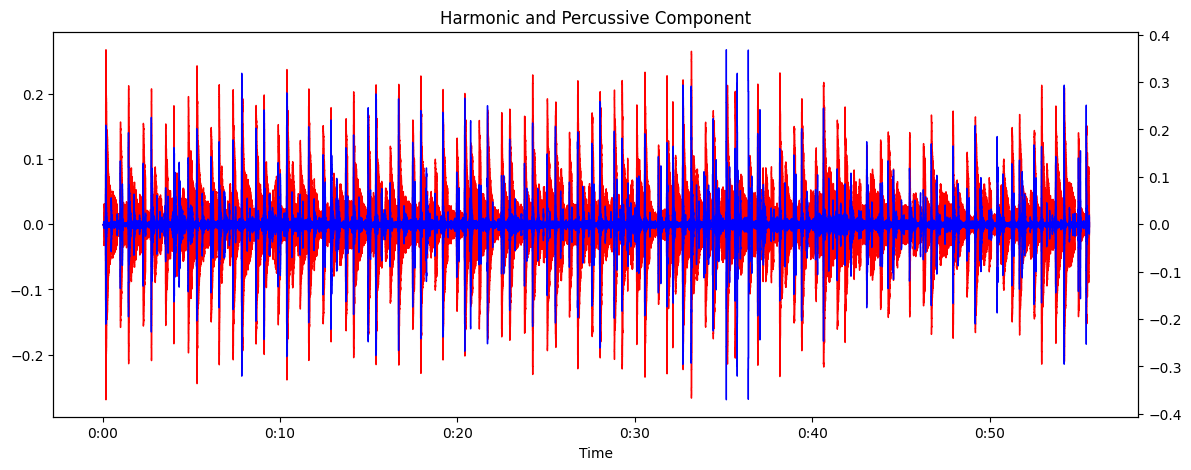

Genre: bengali
Tempo: [129.]
                  min         mean          max            var
cstft        0.000156     0.199827     1.000000       0.089508
srms         0.005507     0.041216     0.165295       0.000920
specband  1074.910115  1766.527976  3035.985945  109998.107302
speccent   670.808756  1262.981703  3517.352402   99261.707189
mfcc      -527.323120    -9.034904   181.138992    6579.006836


In [48]:
gc1 = GenreClassfier(r'data\bengali\bengali1.mp3','bengali')
gc1.plot_Harmonic_Percussion()
gc1.print_features()

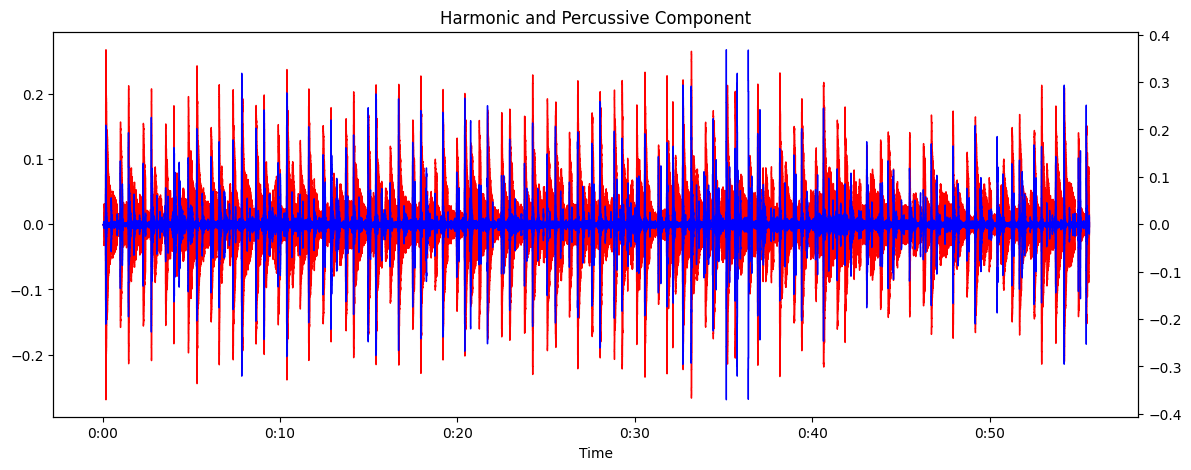

Genre: tamil
Tempo: [144.]
                  min         mean          max            var
cstft        0.000156     0.199827     1.000000       0.089508
srms         0.005507     0.041216     0.165295       0.000920
specband  1074.910115  1766.527976  3035.985945  109998.107302
speccent   670.808756  1262.981703  3517.352402   99261.707189
mfcc      -527.323120    -9.034904   181.138992    6579.006836


In [49]:
gc2 = GenreClassfier(r'data\tamil\tamil1.mp3','tamil')
gc2.plot_Harmonic_Percussion()
gc2.print_features()